# Atelier Data Quality and Data Preprocessing

>In this project we will be working with an open-sourced, real-world, and publicly available data set, which was
created by a survey for gathering salary data for professionals. This project is called **Ask-A-Manager
Salary Survey 2021** and has been conducted by "Alison Green". It asks people to answer some
demographic, professional and salary questions. In fact, the survey is still online and ongoing! You can
find more information on this page: (https://www.askamanager.org/2021/04/how-much-money-do-you-
make-4.html) . The data has been accumulated over time (at the moment of writing this subject, the data
set has around 27000 records) and is accessible at
(https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?
resourcekey#gid=1625408792)
>Since the data set has been crowd-sourced online, many erroneous, imprecise, or even garbage data
may have been introduced. Still, the data set is partially structured, since the users are filling in a
template, with (sometimes) predefined values to choose from
>You are asked to download this dataset and analyze it. The analysis should answer the following
questions
* **Data Exploration**: Compute various data statistics/visualizations that you consider pertinent.
* **Data interpretation and data analysis/mining problems**: What does each feature represent? What are the features that are informative and interesting to keep? For what kind of learning problems could you use this data set?
* **Data Quality Problems**: What quality problems –text and tabular data- do you encounter? What are the possible reasons and solutions?
* **Data cleaning**: Apply data cleaning solutions to repair the dataset
* **Text data processing**: Apply different text processing methods (lemmatization, tokenization, …) and NLP functions in order to transform text variables in numerical values.
* **Data transformation and preprocessing for an algorithm running on numerical data only**:Similarly to question 5, how would you transform the rest of non-numeric data fields to numeric?
* **Data transformation and preprocessing for an algorithm running on both numeric and categorical data**: Are there any preprocessing steps – other than cleaning- that you should perform to use the dataset for an ML algorithm running on any kind of features?
* **Manifold learning**: Use different manifold learning algorithms in order to learn the shape of the data. If possible, compute the reconstruction error on the obtained representations.
* **Reduce the dimensions to 2D or 3D and scatter the data**: Analyse the obtained visualizations depending on used embedding methods and conclude how the quality of the data impact these results.

In [871]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [872]:
# Load the data into a DataFrame
file_path = "Data/Salary Survey.xlsx"
data = pd.read_excel(file_path)

In [874]:
# Copy the dataset to see the difference at the end
df = data.copy()

## Data Exploration
>Compute various data statistics/visualizations

### Data Statistics
>We'll use descriptive statistics (mean, median, min, max, etc.) to understand the distribution of numerical characteristics.

In [875]:
# Viewing the first few rows of the DataFrame:
df.head()

Timestamp How old are you?  What industry do you work in?  \
0 2021-04-27 11:02:09.743            25-34   Education (Higher Education)   
1 2021-04-27 11:02:21.562            25-34              Computing or Tech   
2 2021-04-27 11:02:38.125            25-34  Accounting, Banking & Finance   
3 2021-04-27 11:02:40.643            25-34                     Nonprofits   
4 2021-04-27 11:02:41.793            25-34  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 

   What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)  \
0                                              55000                                                                                                                                                                                      
1                                              54600                                                                                                                                                                                      
2                                              34000                                                                                                                                                                                      
3                                              62000                                                                                                                                                                                      
4                                              60000                                                                                                                                                                                      

   How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.  \
0                                               0.00                                                                                                                                                
1                                            4000.00                                                                                                                                                
2                                                NaN                                                                                                                                                
3                                            3000.00                                                                                                                                                
4                                            7000.00                                                                                                                                                

  Please indicate the currency  \
0                          USD   
1                          GBP   
2                          USD   
3                          USD   
4                          USD   

  If "Other," please indicate the currency here:  

> Rename columns with short, informative names to make data easier to access and more legible.

In [876]:
# Define a columns_names dictionary to match the original column names with the new names to be assigned. 
columns_names = {'Timestamp': 'timestamp',
               'How old are you?': 'age',
               'What industry do you work in?': 'industry', 
               'Job title':'job', 
               'If your job title needs additional context, please clarify here:':'job description', 
               "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":'annual salary',
               'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':'monetary compensation',
               'Please indicate the currency':'currency', 
               'If "Other," please indicate the currency here: ':'other currency',
               'If your income needs additional context, please provide it here:':'income context', 
               'What country do you work in?':'work country',
               "If you're in the U.S., what state do you work in?":'state',
               'What city do you work in?':'work city', 
               'How many years of professional work experience do you have overall?':'work experience',
               'How many years of professional work experience do you have in your field?':'work experience field', 
               'What is your highest level of education completed?':'level education', 
               'What is your gender?':'gender',
               'What is your race? (Choose all that apply.)':'race'}

In [877]:
# Replacing old column names with new ones
df.rename(columns=columns_names, inplace=True)

In [878]:
# Viewing the shape of the DataFrame (number of rows and columns):
df.shape

(27999, 18)

In [879]:
# Count the number of columns for each data type in the DataFrame
df.dtypes.value_counts()

object            15
datetime64[ns]     1
int64              1
float64            1
Name: count, dtype: int64

In [880]:
# Display concise information about the dataframe, including data type, number of non-null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              27999 non-null  datetime64[ns]
 1   age                    27999 non-null  object        
 2   industry               27927 non-null  object        
 3   job                    27998 non-null  object        
 4   job description        7244 non-null   object        
 5   annual salary          27999 non-null  int64         
 6   monetary compensation  20724 non-null  float64       
 7   currency               27999 non-null  object        
 8   other currency         197 non-null    object        
 9   income context         3035 non-null   object        
 10  work country           27999 non-null  object        
 11  state                  23000 non-null  object        
 12  work city              27918 non-null  object        
 13  w

In [881]:
# Calculate the number of missing values for each column in the DataFrame
df.isna().sum()

timestamp                    0
age                          0
industry                    72
job                          1
job description          20755
annual salary                0
monetary compensation     7275
currency                     0
other currency           27802
income context           24964
work country                 0
state                     4999
work city                   81
work experience              0
work experience field        0
level education            216
gender                     167
race                       172
dtype: int64

In [882]:
# Retrieve descriptive statistics from the DataFrame
desc_stats = df.describe()
# configure pandas display options to format floating-point numbers with two decimal places. 
# This prevents floating-point numbers from being displayed in scientific notation.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Display DataFrame with exact values
print(desc_stats)

                           timestamp  annual salary  monetary compensation
count                          27999       27999.00               20724.00
mean   2021-05-12 11:09:44.288459264      147134.65               18192.19
min       2021-04-27 11:02:09.743000           0.00                   0.00
25%    2021-04-27 14:20:40.767000064       54000.00                   0.00
50%       2021-04-28 13:54:17.744000       75000.00                2000.00
75%    2021-04-29 19:38:15.718000128      110000.00               10000.00
max       2023-12-04 16:21:21.907000   870000000.00           120000000.00
std                              NaN     5413731.23              834897.58


### Data Visualizations

'\n* White cells represent missing values\n* Colored cells indicate data present.\n'

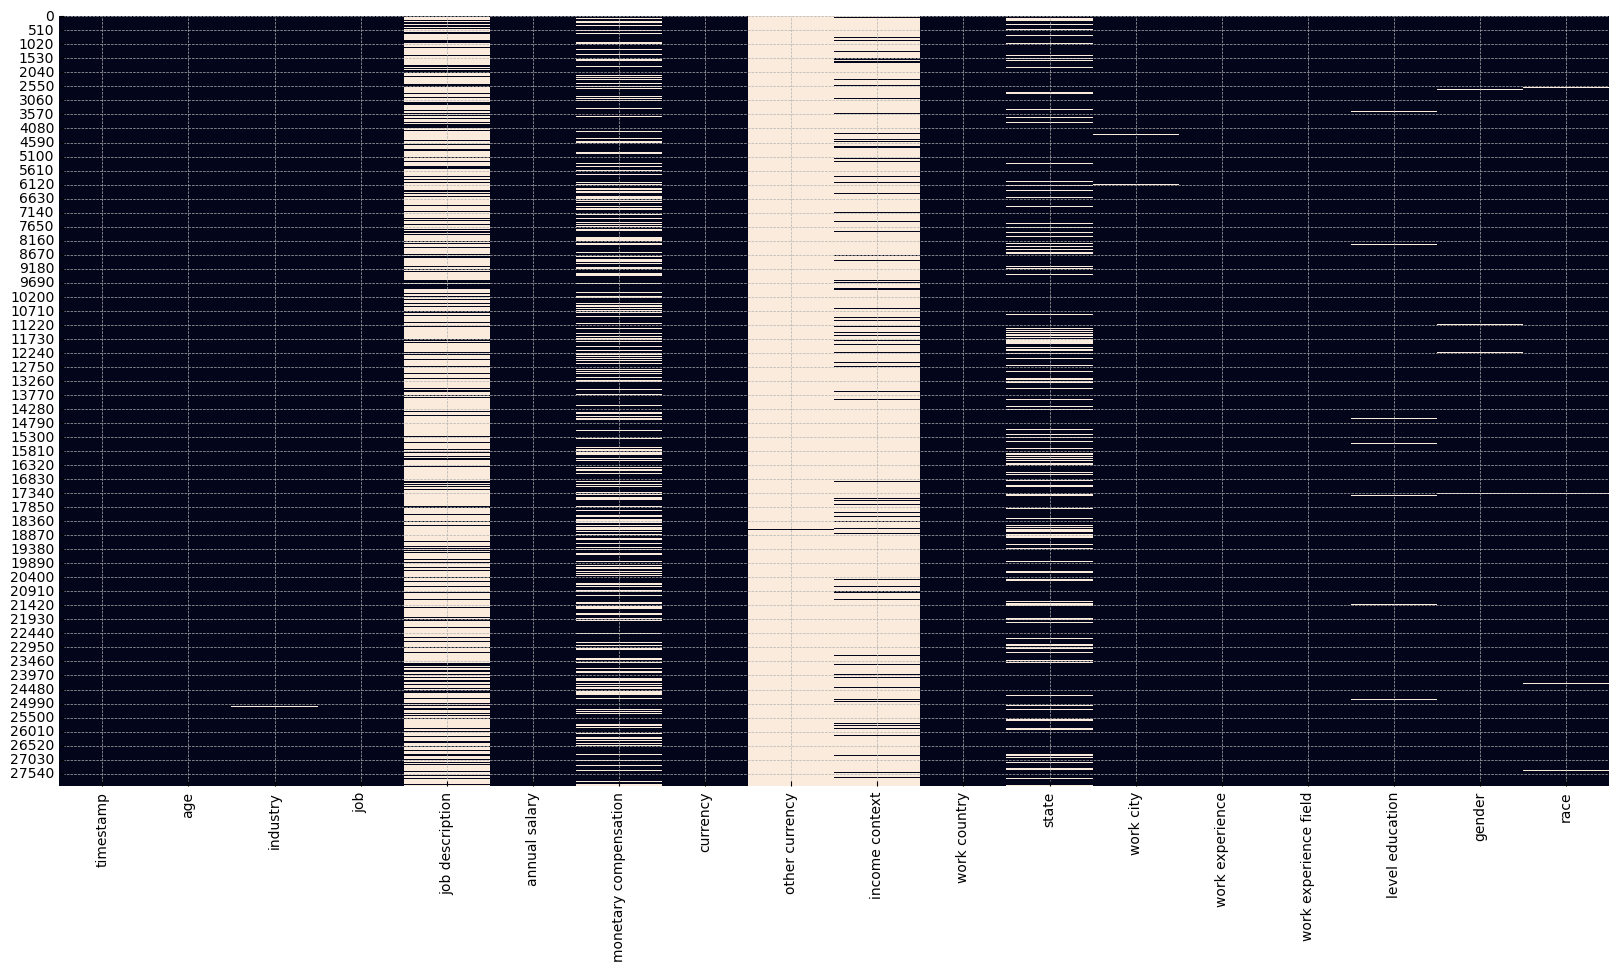

In [883]:
# create a heatmap to visualize missing values in the DataFrame
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
"""
* White cells represent missing values
* Colored cells indicate data present.
"""

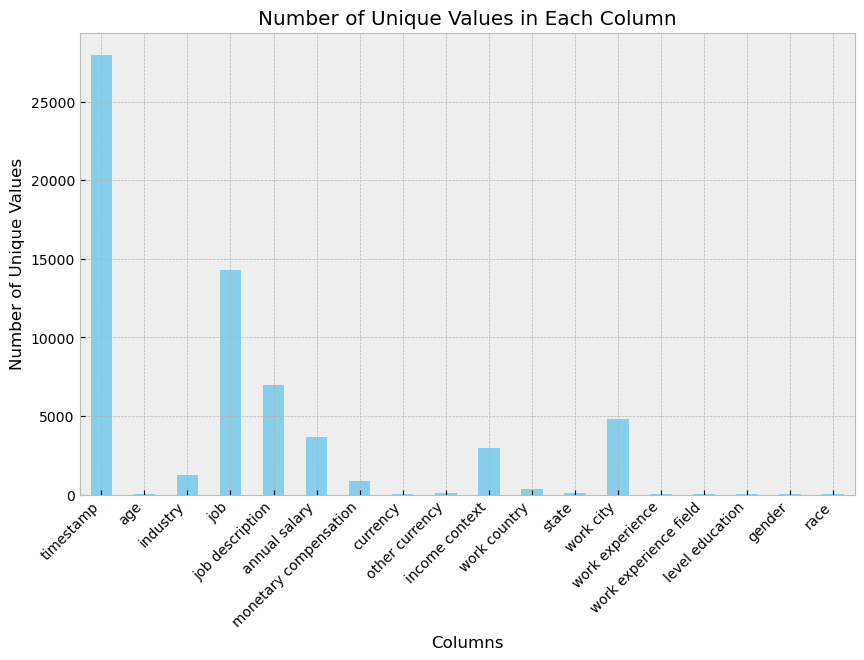

In [884]:
# Iterate over each DataFrame column and retrieve the number of unique values 
for column in df.columns: 
    unique_values_counts = df.nunique()
# Creating a bar graph
plt.figure(figsize=(10, 6))
unique_values_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
# Rotate labels for improved legibility
plt.xticks(rotation=45, ha='right')  
plt.show()

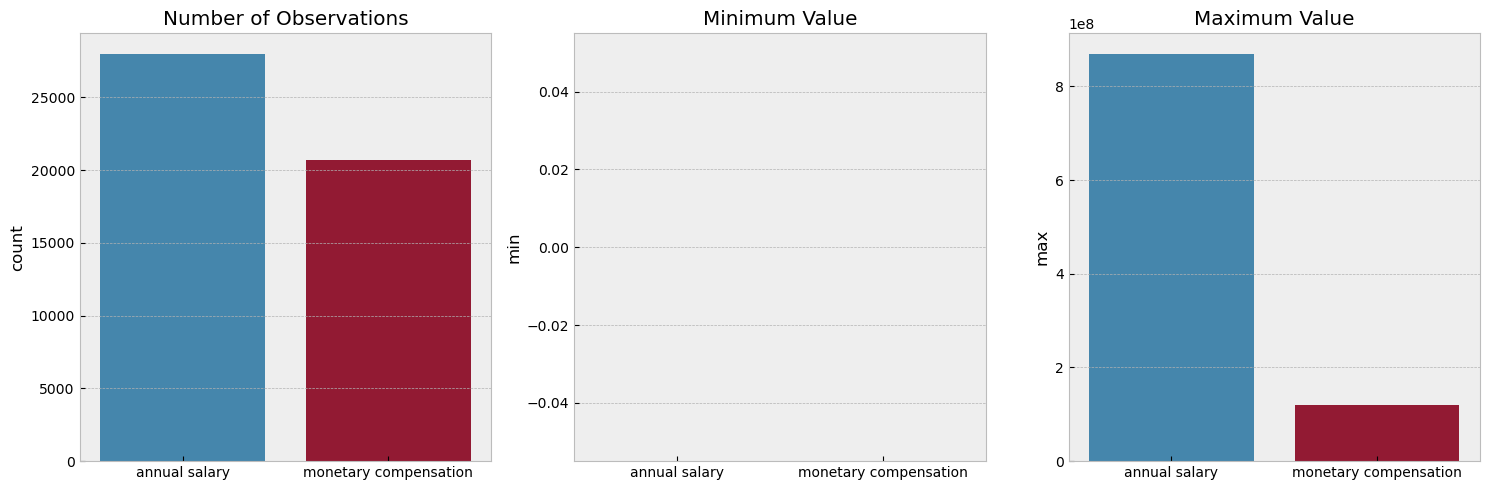

In [885]:
# Retrieve descriptive statistics from the DataFrame
desc_stats = df.describe()
# Transpose the DataFrame for columnar statistics
desc_stats = desc_stats.transpose()

# Eexclude 'Timestamp' column as it makes no sense for certain descriptive statistics 
desc_stats = desc_stats.drop('timestamp', axis=0)

# Creating a subplot with matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Barplot for number of observations (count)
sns.barplot(x=desc_stats.index, y='count', data=desc_stats, ax=axes[0])
axes[0].set_title('Number of Observations')

# Barplot graph for minimum value (min)
sns.barplot(x=desc_stats.index, y='min', data=desc_stats, ax=axes[1])
axes[1].set_title('Minimum Value')

# Barplot graph for maximum value (max)
sns.barplot(x=desc_stats.index, y='max', data=desc_stats, ax=axes[2])
axes[2].set_title('Maximum Value')

# Adjust subplot layout
plt.tight_layout()

# Display graph
plt.show()

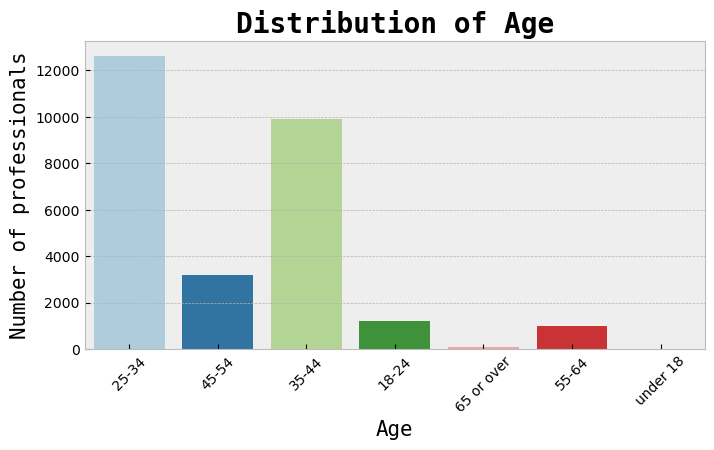

In [886]:
# Creating a distribution plot for 'Age'
plt.figure(figsize=(8, 4))
sns.countplot(x='age', data=df, palette='Paired')
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of professionals', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

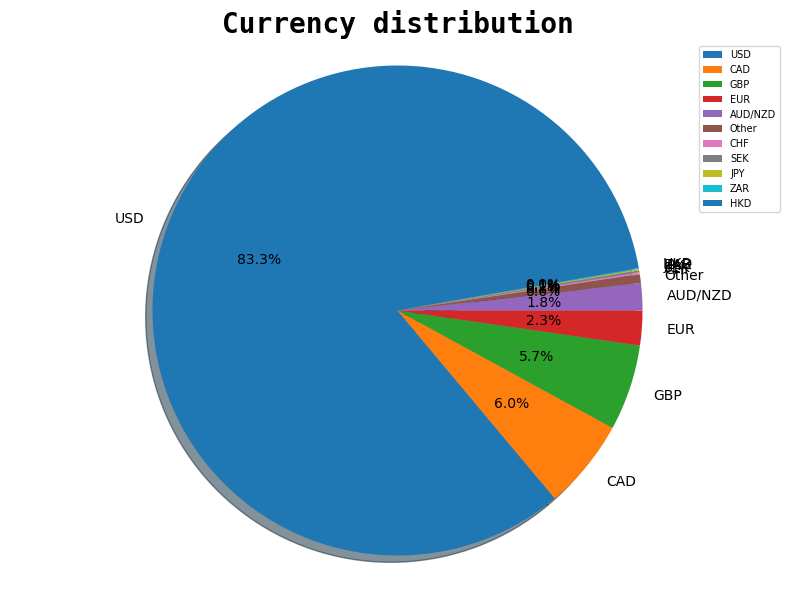

In [888]:
# View the distribution of values in 'currency' column
currency = df['currency'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(currency.values, labels=currency.index, startangle=10, explode=None, shadow=True, autopct='%1.1f%%')
plt.title('Currency distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


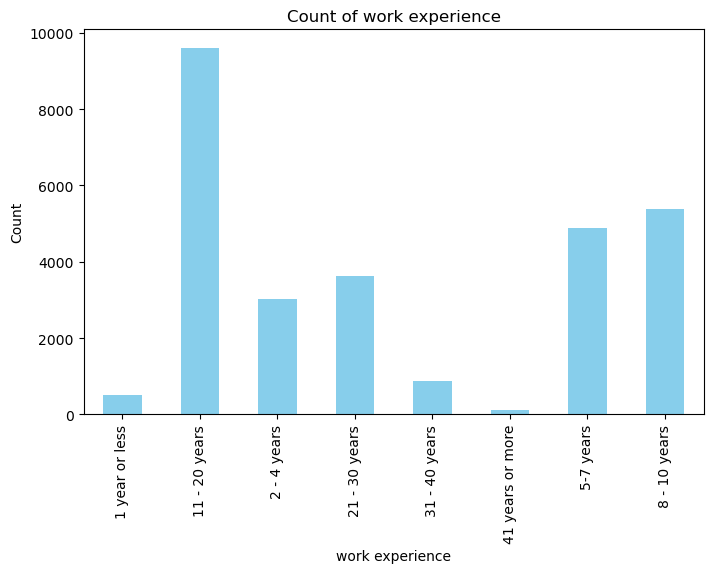

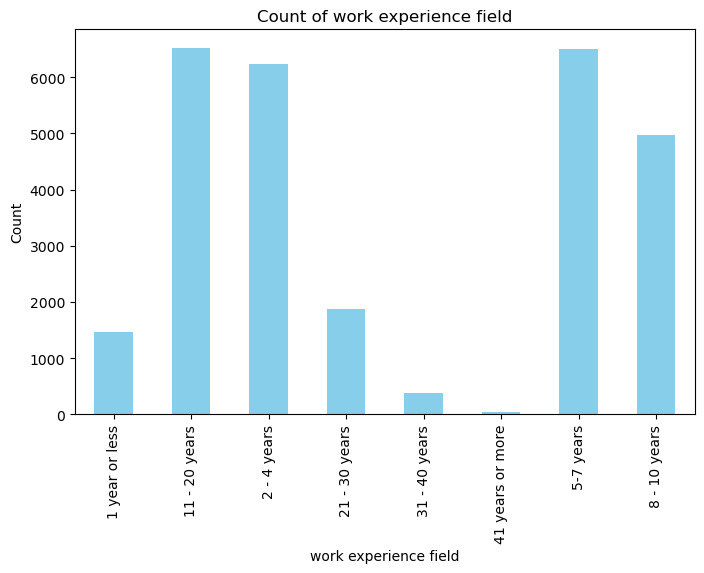

In [889]:
# View the distribution of values in 'work experience', 'work experience field' columns
specified_columns = ['work experience', 'work experience field']
for column in specified_columns:
    plt.figure(figsize=(8, 5))
    # calculate the count of each single value in the column, then sort them by index (ascending order) and create a bar chart
    df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

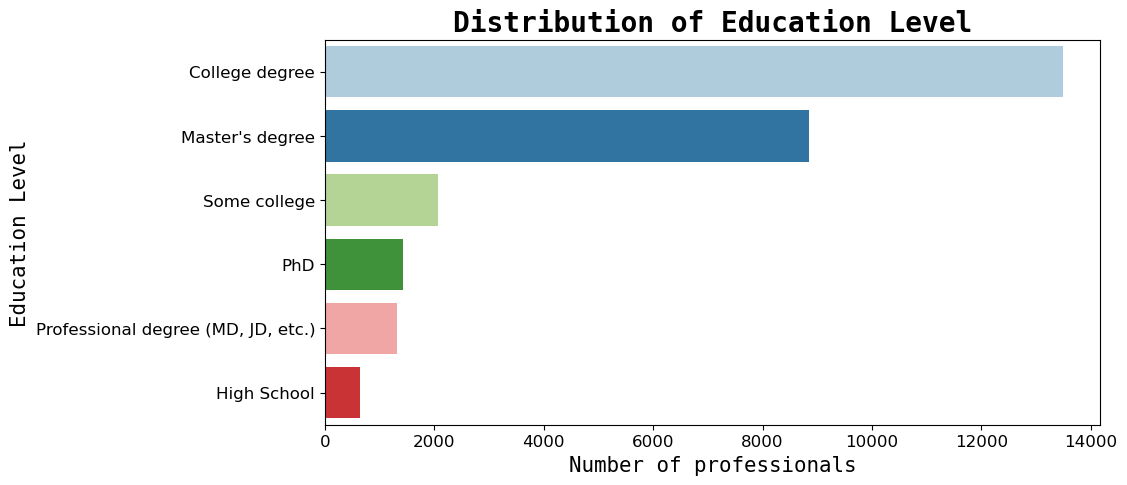

In [890]:
# View the distribution of education level
education = df['level education'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=education.values, y=education.index, palette='Paired')
plt.title('Distribution of Education Level', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of professionals', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education Level', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

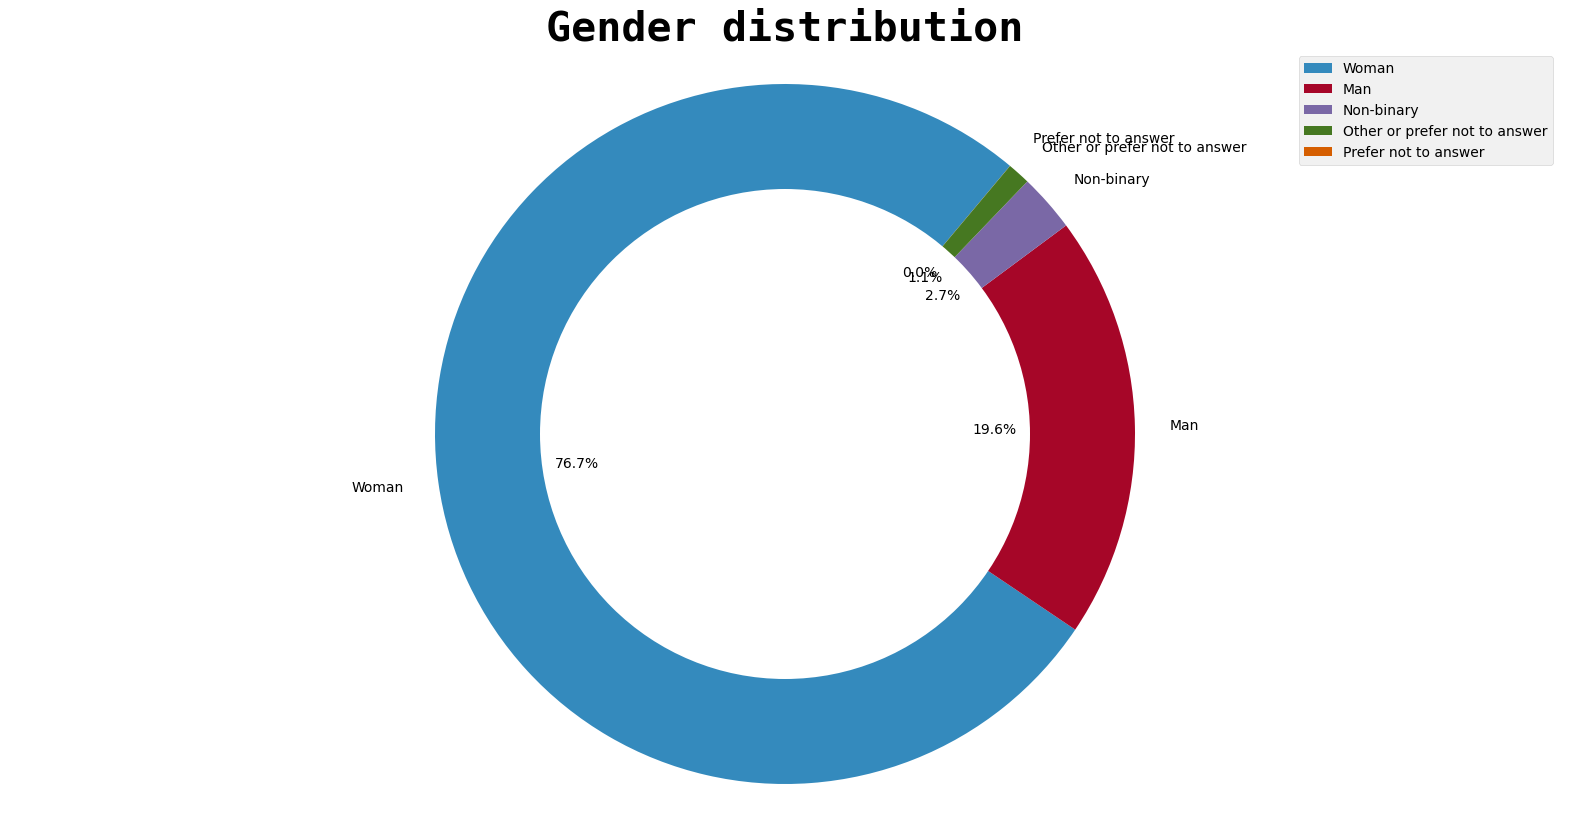

In [891]:
# View the distribution of age by Creating a donut chart 
gender = df['gender'].value_counts()
plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(gender.values, labels=gender.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 10})
plt.show()

## Data interpretation and data analysis/mining problems

In [892]:
# Characteristic exploration
df.nunique()

timestamp                27994
age                          7
industry                  1217
job                      14312
job description           6981
annual salary             3648
monetary compensation      843
currency                    11
other currency             115
income context            2972
work country               370
state                      131
work city                 4807
work experience              8
work experience field        8
level education              6
gender                       5
race                        48
dtype: int64

In [893]:
# Display the number of occurrences of each unique value in the "age" column.
df["age"].value_counts()

age
25-34         12632
35-44          9882
45-54          3184
18-24          1204
55-64           991
65 or over       94
under 18         12
Name: count, dtype: int64

In [894]:
# Display the number of occurrences of each unique value in the "work experience" column.
df["work experience"].value_counts()

work experience
11 - 20 years       9608
8 - 10 years        5370
5-7 years           4871
21 - 30 years       3632
2 - 4 years         3012
31 - 40 years        868
1 year or less       516
41 years or more     122
Name: count, dtype: int64

In [895]:
# Display the number of occurrences of each unique value in the "work experience field" column.
df["work experience field"].value_counts()

work experience field
11 - 20 years       6527
5-7 years           6507
2 - 4 years         6238
8 - 10 years        4968
21 - 30 years       1867
1 year or less      1471
31 - 40 years        381
41 years or more      40
Name: count, dtype: int64

In [896]:
# Display the number of occurrences of each unique value in the "level education" column.
df["level education"].value_counts()

level education
College degree                        13490
Master's degree                        8849
Some college                           2058
PhD                                    1426
Professional degree (MD, JD, etc.)     1322
High School                             638
Name: count, dtype: int64

In [897]:
# Defining a dict. with column names as keys, and new dtype as values
new_dtypes = {'age': 'category', 'work experience': 'category',
                'work experience field': 'category', 'level education': 'category', 'gender': 'category','currency':'category'}
# Casting the previously identified dict.
df = df.astype(new_dtypes)

In [898]:
# Count again the number of columns for each data type in the DataFrame
df.dtypes.value_counts()

object            9
category          2
datetime64[ns]    1
category          1
int64             1
float64           1
category          1
category          1
category          1
Name: count, dtype: int64

## Data Quality Problems

In [899]:
# Checking for number of duplicate records
df.duplicated().sum()

0

In [900]:
# Calculate the number of missing values for each column in the DataFrame
df.isna().sum()

timestamp                    0
age                          0
industry                    72
job                          1
job description          20755
annual salary                0
monetary compensation     7275
currency                     0
other currency           27802
income context           24964
work country                 0
state                     4999
work city                   81
work experience              0
work experience field        0
level education            216
gender                     167
race                       172
dtype: int64

>Null value in the **job** column. this is a missing value with no identifiable reason, so deletion could be less problematic

In [901]:
# Display the number of missing values per column sorted by percentage
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

timestamp               0.00
age                     0.00
work experience field   0.00
annual salary           0.00
work experience         0.00
currency                0.00
work country            0.00
job                     0.00
industry                0.00
work city               0.00
gender                  0.01
race                    0.01
level education         0.01
state                   0.18
monetary compensation   0.26
job description         0.74
income context          0.89
other currency          0.99
dtype: float64

>The columns **job description** , **income context** and **other currency** have high rates of missing values
(74% , 89% and 99%, respectively).As this information is not crucial to our analyses, we will delete it.

In [902]:
# Display the number of occurrences of each unique value in the "gender" column.
df["gender"].value_counts()

gender
Woman                            21339
Man                               5455
Non-binary                         743
Other or prefer not to answer      294
Prefer not to answer                 1
Name: count, dtype: int64

>The survey form proposes only these four values for the question "What is your gender? : 
* Man
* Woman
* Non-binary
* Other or prefer not to answer

> We find that the category "Other or prefer not to answer" contains both "Other" and "Prefer not to answer", 
we'll consider combining them into a single "Prefer not to answer" category. This would simplify categorization and would
not lose any important information, given that the "Other" category itself is already a fairly general category.

> Concerning missing values, there is only one missing value for this column, so we will replace the missing value with the default value 'Prefer not to answer', as it is important to retain as much information as possible on salaries, ages, etc. 

In [903]:
# Display the number of occurrences of each unique value in the "race" column.
df["race"].value_counts()

race
White                                                                                                                            23189
Asian or Asian American                                                                                                           1394
Black or African American                                                                                                          674
Another option not listed here or prefer not to answer                                                                             621
Hispanic, Latino, or Spanish origin                                                                                                598
Hispanic, Latino, or Spanish origin, White                                                                                         384
Asian or Asian American, White                                                                                                     343
Black or African American, White                  

> The issue of collecting data on race in surveys can raise legitimate concerns about confidentiality and sensitivity.
Indeed, the collection of such information can potentially be perceived as intrusive and may pose ethical challenges.

> So we're going to exclude the **race** column as it's not relevant or appropriate for our analysis, 

In [904]:
# Calculation of the mean and median of the "monetary compensation" column 
mean = df["monetary compensation"].mean()
median = df["monetary compensation"].median()
print("The mean result : ", mean)
print("the median result : ", median)

The mean result :  18192.19339895773
the median result :  2000.0


> Since the mean is significantly higher than the median, this suggests a skewed distribution in the **monetary compensation** 
column. The presence of missing values may influence the mean disproportionately. In order to better represent the central 
tendency of the data despite the missing values, we will replace these values by the median rather than the mean.

In [905]:
df['work country'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

> Given the diversity of entries in the **work country** column, which represent the same value for 'work country' but are misspelled, it would make sense to standardize these values and group them under a single representation.


In [906]:
text_columns =['age','industry', 'job', 'currency', 'work country', 'state','work city', 'work experience',\
               'work experience field', 'level education', 'gender']
for col in text_columns:
    print(f"Numbre of uniques values : {col} is {df[col].nunique()}")

Numbre of uniques values : age is 7
Numbre of uniques values : industry is 1217
Numbre of uniques values : job is 14312
Numbre of uniques values : currency is 11
Numbre of uniques values : work country is 370
Numbre of uniques values : state is 131
Numbre of uniques values : work city is 4807
Numbre of uniques values : work experience is 8
Numbre of uniques values : work experience field is 8
Numbre of uniques values : level education is 6
Numbre of uniques values : gender is 5


> The data contains superfluous white spaces at the beginning or end of the string, which can lead to errors when analyzing 
or manipulating the data.
> We'll use the **str.strip()** method to remove white spaces at the beginning and end of strings in each text column.

>In addition, to normalize string case and avoid potential problems related to case sensitivity, 
>we'll also use the **str.lower()** method. This operation will convert all letters in each text string to lower case, ensuring uniformity throughout the data.


In [907]:
# Display the number of occurrences of each unique value in the "state" column.
df["state"].value_counts()

state
California              2608
New York                2168
Massachusetts           1520
Texas                   1266
Illinois                1210
                        ... 
Illinois, Kentucky         1
Illinois, Wisconsin        1
California, Oklahoma       1
Alabama, Kansas            1
Alabama, Oregon            1
Name: count, Length: 131, dtype: int64

> When a respondent indicates that they are located in the United States (USA), the question about the state in which they work can be filled in with a specific choice of American states. However, if this information is not provided, we have decided to replace missing values in the "state" column with **not in usa**. This approach simplifies data management by clearly indicating that the specific location in the USA has not been filled in, while preserving the consistency of the database.

In [908]:
# Display the number of occurrences of each unique value in the "level education" column.
df["level education"].value_counts()

level education
College degree                        13490
Master's degree                        8849
Some college                           2058
PhD                                    1426
Professional degree (MD, JD, etc.)     1322
High School                             638
Name: count, dtype: int64

In [909]:
# Display the number of occurrences of each unique value in the "level education" column.
df["level education"].isna().sum()

216

>In the context of the form, the question on level of education offers several options to choose from, such as 
**"college degree" "master's degree" "some college" "phd" "professional degree (md, jd, etc.)" and "high school"** 

> Where this information is not provided (null value),we have taken the decision to replace these missing values in the "level education" column with **not specified** This approach aims to clearly indicate that no particular level of education has been specified, thus contributing to the clarity and consistency of the data.

In [910]:
# Display the number of occurrences of each unique value in the "industry" column.
df["industry"].value_counts()

industry
Computing or Tech                                4684
Education (Higher Education)                     2460
Nonprofits                                       2417
Health care                                      1889
Government and Public Administration             1886
                                                 ... 
Architectural/Land Planning/Civil Engineering       1
Gaming (Gambling)                                   1
Regulatory Affairs- nutraceuticals                  1
Manufacturing : corporate admin support             1
I'm currently a student and don't have a job        1
Name: count, Length: 1217, dtype: int64

In [911]:
# Display the number of occurrences of each unique value in the "industry" column.
df["industry"].isna().sum()

72

>In the form, the industry question offers several options to choose from
> When this information is not provided (null value), we have decided to replace these missing values in the "industry" column with **not specified**. This approach aims to clearly indicate that no information has been specified, thus contributing to the clarity and consistency of the data.

In [912]:
# Display the number of occurrences of each unique value in the "work city" column.
df["work city"].value_counts()

work city
Boston            771
Chicago           751
New York          711
Seattle           691
London            573
                 ... 
Hartsville          1
Sturtevant          1
metro               1
Birmingham UK       1
denton              1
Name: count, Length: 4807, dtype: int64

In [913]:
# Display the number of occurrences of each unique value in the "industry" column.
df["work city"].isna().sum()

81

>In the form, the question relating to **work city** offers the possibility of entering the city of work.
> When this information is not provided (null value), we have decided to replace these missing values in the "work city" column with **unkown**. This approach aims to clearly indicate that no information has been specified, thus contributing to the clarity and consistency of the data.

## Data cleaning

In [914]:
# Delete null value in the job column
df = df.dropna(subset=['job'])

In [915]:
# Delete columns with 70% missing information
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.7 ]]

In [917]:
# Replace 'other or prefer not to answer', 'Prefer not to answer' values with the value 'Prefer not to answer'.
df['gender'] = df['gender'].replace(['Other or prefer not to answer', 'Prefer not to answer'], 'prefer not to answer')

In [918]:
# Replace missing values in the "gender" column with the value 'Prefer not to answer'.
df['gender'].fillna(value='prefer not to answer', inplace=True)

In [919]:
# Exclude the 'race' column
df = df.drop("race", axis=1)

In [920]:
# Imputation of missing values by the median
df['monetary compensation'].fillna(median, inplace=True)

In [921]:
# Removal of spaces at the beginning and end of each string, for each column of the text_columns list
print("Number of unique values before and after str.strip() method :")
for col in text_columns:
    print(f"{col} : {df[col].nunique()}")
    df[col] = df[col].str.strip()
    print(f"{col} : {df[col].nunique()}")

Number of unique values before and after str.strip() method :
age : 7
age : 7
industry : 1216
industry : 1129
job : 14312
job : 13374
currency : 11
currency : 11
work country : 370
work country : 309
state : 131
state : 131
work city : 4807
work city : 4223
work experience : 8
work experience : 8
work experience field : 8
work experience field : 8
level education : 6
level education : 6
gender : 4
gender : 4


In [922]:
# Convert all text strings to lowercase, for each column of the text_columns list.
print("Number of unique values before and after str.lower() method :")
for col in text_columns:
    print(f"{col} : {df[col].nunique()}")
    df[col] = df[col].str.lower()
    print(f"{col} : {df[col].nunique()}")

Number of unique values before and after str.lower() method :
age : 7
age : 7
industry : 1129
industry : 1001
job : 13374
job : 12084
currency : 11
currency : 11
work country : 309
work country : 251
state : 131
state : 131
work city : 4223
work city : 3874
work experience : 8
work experience : 8
work experience field : 8
work experience field : 8
level education : 6
level education : 6
gender : 4
gender : 4


In [923]:
# Replace missing values in the "state" column with the value 'not in usa'.
df['state'].fillna(value='not in usa', inplace=True)

In [924]:
# Replace missing values in the "level education" column with the value 'not specified'.
df['level education'].fillna(value='not specified', inplace=True)

In [925]:
# Replace missing values in the "work city" column with the value 'unknown.
df['work city'].fillna(value='unknown', inplace=True)

In [926]:
# Replace missing values in the "industry" column with the value 'not specified'.
df['industry'].fillna(value='not specified', inplace=True)

In [927]:
print(df.isna().sum())

timestamp                0
age                      0
industry                 0
job                      0
annual salary            0
monetary compensation    0
currency                 0
work country             0
state                    0
work city                0
work experience          0
work experience field    0
level education          0
gender                   0
dtype: int64


## Text data processing

In [928]:
df.nunique()

timestamp                27993
age                          7
industry                  1002
job                      12084
annual salary             3648
monetary compensation      843
currency                    11
work country               251
state                      132
work city                 3875
work experience              8
work experience field        8
level education              7
gender                       4
dtype: int64

In [929]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')
import re

In [930]:
def preprocess_column(column, lemmatize=True, stem=True):
    def preprocess_text(text):
        text = re.sub(r'[^a-zA-Z0-9 \U0001F1E6-\U0001F1FF]', ' ', text)
        words = word_tokenize(text.lower())
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        # Lemmatisation
        if lemmatize:
            lemmatizer = WordNetLemmatizer()
            words = [lemmatizer.lemmatize(word) for word in words]
        # Stemming
        if stem:
            stemmer = PorterStemmer()
            words = [stemmer.stem(word) for word in words]
        return ' '.join(words)
    return column.apply(preprocess_text)


In [931]:
preprocess_columns =['industry','job']
print("Number of unique values :")
for col in preprocess_columns :
    print(f"Before Preprocess Column '{col}' : {df[col].nunique()}")
    df[col] = preprocess_column(df[col], lemmatize=True, stem=True)
    print(f"After Preprocess Column '{col}' : {df[col].nunique()}")

Number of unique values :
Before Preprocess Column 'industry' : 1002
After Preprocess Column 'industry' : 935
Before Preprocess Column 'job' : 12084
After Preprocess Column 'job' : 11461


In [932]:
preprocess_country_city =['work country', 'work city']
print("Number of unique values :")
for col in preprocess_country_city:
    print(f"Before Preprocess Column '{col}' : {df[col].nunique()}")
    df[col] = preprocess_column(df[col], lemmatize=True, stem=False)
    print(f"After Preprocess Column '{col}' : {df[col].nunique()}")

Number of unique values :
Before Preprocess Column 'work country' : 251
After Preprocess Column 'work country' : 225
Before Preprocess Column 'work city' : 3875
After Preprocess Column 'work city' : 3723


In [933]:
import pycountry
import pycity
from difflib import get_close_matches
from difflib import SequenceMatcher

In [934]:
# Define a function to retrieve country information
def countriesInfo():
    countries_info = {}
    countries = list(pycountry.countries)
    for country in countries:
        countries_info[country.name.lower()] =[
            country.name.lower(),
            country.alpha_2.lower(),
            country.alpha_3.lower(),
            country.official_name.lower() if hasattr(country, 'official_name') else None
            ]
    return countries_info

In [935]:
countries_info = countriesInfo()
# We have information from 249 countries
len(countries_info)

C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


249

In [936]:
# define a function that checks country validity and returns a list of valid countries and a list of invalid countries
def validityCountries(df_column):
    valid_countries = []
    invalid_countries = []
    for value in df_column:
        try:
            country_info = pycountry.countries.lookup(value)
        except LookupError:
            invalid_countries.append(value)
            continue
        corrections_countries[value] = country_info.name.lower()
        valid_countries.append(value)
    return list(set(valid_countries)), list(set(invalid_countries))

In [937]:
corrections_countries ={}
valid_countries, invalid_countries= validityCountries(df['work country'])
print("Number of valid countries ", len(valid_countries))
print("Number of invalid countries ", len(invalid_countries))

Number of valid countries  90
Number of invalid countries  135


In [938]:
# Search the country information dictionary (to match with information from each country)
def partialMatches(invalid_countries, cutoff):
    partial_match = {}
    for invalid_value in invalid_countries:
        ratio = 0
        current_match = None
        for country_list in countries_info.values():
            matches_country = get_close_matches(invalid_value, country_list, n=1, cutoff=cutoff)
            if matches_country:
                match_ratio = SequenceMatcher(None, invalid_value, matches_country[0]).ratio()
                if match_ratio > ratio:
                    current_match = country_list[0]
                    ratio = match_ratio
        if current_match:
            partial_match[invalid_value] = current_match
    return partial_match

In [939]:
# After several tests, we have found that the 0.75 cutoff gives good results.
partial_match = partialMatches(invalid_countries, cutoff=0.8)

In [940]:
# add matched values to valid_countries and remove them from the invalid_countries list
for invalid_value, corrected_value in partial_match.items():
    #print(f"{invalid_value} => {corrected_value}")
    corrections_countries[invalid_value] = corrected_value
    invalid_countries.remove(invalid_value)
    valid_countries.append(invalid_value)

In [941]:
print("Number of valid countries ", len(valid_countries))
print("Number of invalid countries ", len(invalid_countries))

Number of valid countries  153
Number of invalid countries  72


In [942]:
# we're going to treat invalid countries with work city
print(invalid_countries)

['', 'northern ireland', 'u govt employee overseas country withheld', 'n remote wherever want', 'canada usa', 'get raise get quarterly bonus periodically ass income area work got raise 3rd party assessment showed paid little area located', 'canada ottawa ontario', 'united kingdom england', 'located canada work company u', 'uk northern ireland', 'russia', 'hartford', 'uk u company', 'new zealand aotearoa', 'work uae based organization though personally u', 'aotearoa new zealand', 'usa company based u territory work remote', 'remote philippine', 'austria work remotely dutch british company', 'usa tomorrow', '2 175 84 year deducted benefit', 'turkey', 'argentina org thailand', 'virginia', 'japan u gov position', 'mainland china', 'united state puerto rico', 'u', 'europe', 'san francisco', 'usa foreign gov', 'romania u based company', 'englang', 'policy', 'america', 'scotland', 'england uk', 'uk england', 'bonus based meeting yearly goal set w supervisor', 'united state work home client u 

In [943]:
# retrieve all cities grouped by work country
unique_cities_country = df.groupby('work country')['work city'].unique().to_dict()

In [944]:
df['work city'].nunique()

3723

In [945]:
from geopy.geocoders import Nominatim

In [946]:
def validateCity(city):
    geolocator = Nominatim(user_agent="my_geocoder")
    try:
        location = geolocator.geocode(city, exactly_one=True)
    except:
        return False
    if location : 
            address_info = location.address.split(',')
            #  Retrieve the first element as a city
            city_valid = address_info[0].strip().lower()
            # Retrieve the last item as a country
            country_valid = address_info[-1].strip().lower()
            if city == city_valid :
                valid_city_country[city] = country_valid
                return True
            else:
                return False
    return False

In [947]:
# Retrieve a unique list of cities 
unique_cities = df['work city'].unique()
# a dictionary contains valid cities and their valid countries
valid_city_country = {}
invalid_cities, valid_cities =[] , []

In [948]:
# Apply the validate city function to each city and retrieve valid and invalid cities 
for city in unique_cities :
    if validateCity(city) :
        valid_cities.append(city)
    else :
        invalid_cities.append(city)

In [949]:
print("Number of valid cities ", len(valid_cities))
print("Number of invalid cities ", len(invalid_cities))

Number of valid cities  1963
Number of invalid cities  1760


In [950]:
# Create a new list to store corrected invalid countries
corrections_invalid_countries = []
for country, cities in unique_cities_country.items():
    if country in invalid_countries:
        # visit every city in the country
        for city in cities:
            # if the city is valid
            if city in valid_cities:
                # if the country does not correspond to the country of the city, we replace it with the valid country 
                if country != valid_city_country[city]:
                    corrections_countries[country] = valid_city_country[city]
                    # Add the corrected country to the new list
                    corrections_invalid_countries.append(country)

In [951]:
# Remove corrected countries from the list of invalid countries
for corrected_country in corrections_invalid_countries:
    if corrected_country in invalid_countries :
        invalid_countries.remove(corrected_country)

In [952]:
print("Number of invalid countries", len(invalid_countries))
print(invalid_countries)

Number of invalid countries 25
['u govt employee overseas country withheld', 'n remote wherever want', 'located canada work company u', 'russia', 'uk u company', 'aotearoa new zealand', 'remote philippine', 'austria work remotely dutch british company', 'turkey', 'argentina org thailand', 'japan u gov position', 'mainland china', 'europe', 'romania u based company', 'bonus based meeting yearly goal set w supervisor', 'work u based company argentina', 'uk globally fully remote company', 'worldwide based u short term trip aroudn world', 'usa virgin island', 'jersey channel island', 'africa', 'international', 'company germany work pakistan', 'u k northern england', 'contract']


In [953]:
# ...

In [954]:
# Replace all invalid countries with known
for invalid_country in invalid_countries :
    corrections_countries[invalid_country] = 'unknown'

In [955]:
# Replace all corrected countries with their corrections 
print("Before Cleaning countries ", df['work country'].nunique())
df['work country'] = df['work country'].replace(corrections_countries)
print("After Cleaning countries ", df['work country'].nunique())

Before Cleaning countries  225
After Cleaning countries  99


In [956]:
# Replace all invalid cities with known
print("Before Process cities ", df['work city'].nunique())
df['work city'] = df['work city'].replace(invalid_cities, 'unknown')
print("After Process cities ", df['work city'].nunique())

Before Process cities  3723
After Process cities  1963


In [957]:
#Save the cleaned data
df.to_excel('Data/Data_Cleaned.xlsx', index=False)

In [958]:
df_numeric = df.copy()

## Data transformation and preprocessing for an algorithm running on numerical data only

>To transform non-numerical data fields into numerical data for an algorithm that works only with numerical data, you can use different techniques depending on the nature of the data. Here are some common approaches:

* **Datetime conversion :** we have the 'timestamp' column of type datetime, we can extract significant characteristics such as year, month, day, etc., or convert the date into a numeric timestamp.

In [959]:
# Convert 'timestamp' column to datetime format
df_numeric['timestamp'] = pd.to_datetime(df_numeric['timestamp'])
# Extracting temporal characteristics
df_numeric['year'] = df_numeric['timestamp'].dt.year
df_numeric['month'] = df_numeric['timestamp'].dt.month
df_numeric['day_of_week'] = df_numeric['timestamp'].dt.dayofweek
df_numeric['hour'] = df_numeric['timestamp'].dt.hour
df_numeric['minute'] = df_numeric['timestamp'].dt.minute
df_numeric['second'] = df_numeric['timestamp'].dt.second

In [960]:
# Exclude the 'timestamp' column
df_numeric = df_numeric.drop("timestamp", axis=1)

* **Mapping** we can assign numerical values according to level of education, for example, using the educational order (doctorate > master > bachelor, etc.)

In [961]:
# Mapping to assign numerical values according to education level
education_mapping = {
    'not specified' : 0,
    'high school': 1,
    'some college': 2,
    'college degree': 3,
    'master\'s degree': 4,
    'phd': 5,
    'professional degree (md, jd, etc.)': 6
}
# Apply the transformation using the map method
df_numeric['level education'] = df_numeric['level education'].map(education_mapping)

* **Age:** Age groups can be transformed into numerical values representing their positions on a scale. For instance, assigning negative values for groups below 65 and positive values for the "65 or over" group simplifies the representation while preserving the relative order of age groups. For instance, "25-34" might be represented as -30, maintaining the ordinal nature of the original data.

In [962]:
# Replace age categories with numerical values
df_numeric['age'] = df_numeric['age'].replace({
    'under 18': -18,
    '18-24': -25,
    '25-34': -35,
    '35-44': -45,
    '45-54': -55,
    '55-64': -65,
    '65 or over': +65
})

## Data transformation and preprocessing for an algorithm running on both numeric and categorical data

* **One-Hot Encoding:** For nominal categorical variables (categories with no inherent order), one-hot encoding is often more appropriate. It creates binary columns for each category and indicates the presence of a category with a 1 or 0.

In [963]:
# Apply one-hot encoding to a categorical column 'gender'
df_numeric = pd.get_dummies(df_numeric, columns=['gender'], prefix=['gender'])

In [964]:
# Apply one-hot encoding to a categorical column 'currency'
df_numeric = pd.get_dummies(df_numeric, columns=['currency'], prefix=['currency'])

In [965]:
# Get boolean columns
boolean_columns = df_numeric.select_dtypes(include=bool).columns
# Convert boolean columns to integers
for column in boolean_columns:
    df_numeric[column] = df_numeric[column].astype(int)

* **Label Encoding:** For categorical variables with ordinal relationships (i.e., where there is a significant order), you can use label encoding. This involves assigning a unique numerical label to each category. Many machine learning libraries, such as scikit-learn in Python, provide functions for label encoding.

In [966]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [967]:
# Apply label encoding to a categorical column 'work experience' and 'work experience field'
df_numeric['work experience'] = le.fit_transform(df_numeric['work experience'])
df_numeric['work experience field'] = le.fit_transform(df_numeric['work experience field'])    

In [968]:
# Select numeric columns
df_num = df_numeric.select_dtypes(include=['float64', 'int64','int32'])

In [969]:
df_num.head()

age  annual salary  monetary compensation  work experience  \
0  -35          55000                   0.00                6   
1  -35          54600                4000.00                7   
2  -35          34000                2000.00                2   
3  -35          62000                3000.00                7   
4  -35          60000                7000.00                7   

   work experience field  level education  year  month  day_of_week  hour  \
0                      6                4  2021      4            1    11   
1                      6                3  2021      4            1    11   
2                      2                3  2021      4            1    11   
3                      6                3  2021      4            1    11   
4                      6                3  2021      4            1    11   

   ...  currency_cad  currency_chf  currency_eur  currency_gbp  currency_hkd  \
0  ...             0             0             0             0             0   
1  ...             0             0             0             1             0   
2  ...             0             0             0             0             0   
3  ...             0             0             0             0             0   
4  ...             0             0             0             0             0   

   currency_jpy  currency_other  currency_sek  currency_usd  currency_zar  
0             0               0             0             1             0  
1             0               0             0             0             0  
2             0               0             0             1             0  
3             0               0             0             1             0  
4             0               0             0             1             0  

[5 rows x 27 columns]

In [970]:
# Save the numeric data to Excel
df_num.to_excel('Data/numeric_data.xlsx', index=False)

## Manifold learning 

In [971]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

> Multiple learning can be achieved by using different unsupervised learning algorithms to learn the structure of the data. 
For each algorithm, we can calculate the reconstruction error to assess the quality of the representation obtained. Here's an example using two commonly used algorithms: **Gaussian Mixture Model (GMM)** and **the k-means algorithm**.

In [972]:
numerical_columns = df_num.columns
X_numerical = df_num[numerical_columns].values

### KMeans

In [973]:
# Apply K-Means
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(X_numerical)

# Calculating reconstruction error with K-Means
centroids_kmeans = kmeans.cluster_centers_
X_reconstructed_kmeans = centroids_kmeans[labels_kmeans]
reconstruction_error_kmeans = mean_squared_error(X_numerical, X_reconstructed_kmeans)
print("Reconstruction error with K-Means :", reconstruction_error_kmeans)

C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Reconstruction error with K-Means : 13462285720.367153


### Gaussian Mixture Model (GMM) 

In [974]:
# Apply GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X_numerical)
labels_gmm = gmm.predict(X_numerical)

# Calculating reconstruction error withc GMM
X_reconstructed_gmm = gmm.means_[labels_gmm]
reconstruction_error_gmm = mean_squared_error(X_numerical, X_reconstructed_gmm)
print("Reconstruction error with GMM :", reconstruction_error_gmm)

Reconstruction error with GMM : 13462285720.367142


> The reconstruction error with **K-Means** is lower than that with **GMM**
> This indicates that the K-Means clustering algorithm has better represented the original data. and gives a better reconstruction of the data than GMM, as it has a lower reconstruction error. 

## Reduce the dimensions to 2D or 3D and scatter the data

### PCA

In [975]:
# Apply PCA to reduce in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numerical)

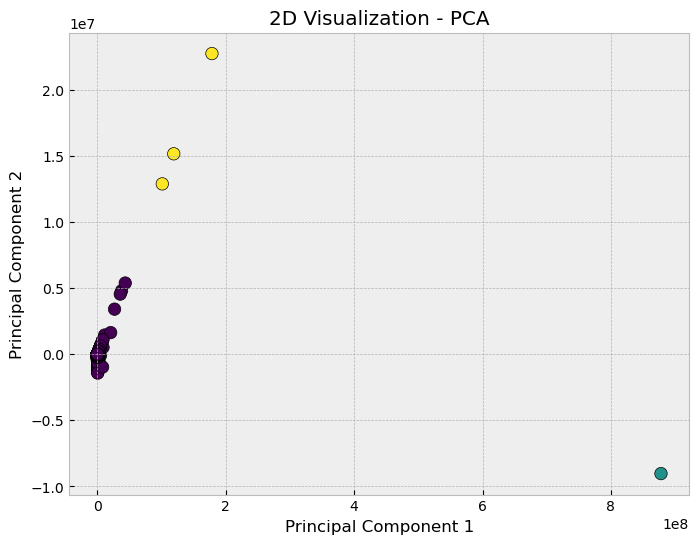

In [976]:
# 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, edgecolors='k', marker='o', s=80, cmap='viridis')
plt.title('2D Visualization - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [977]:
# Apply PCA to reduce in 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_numerical)

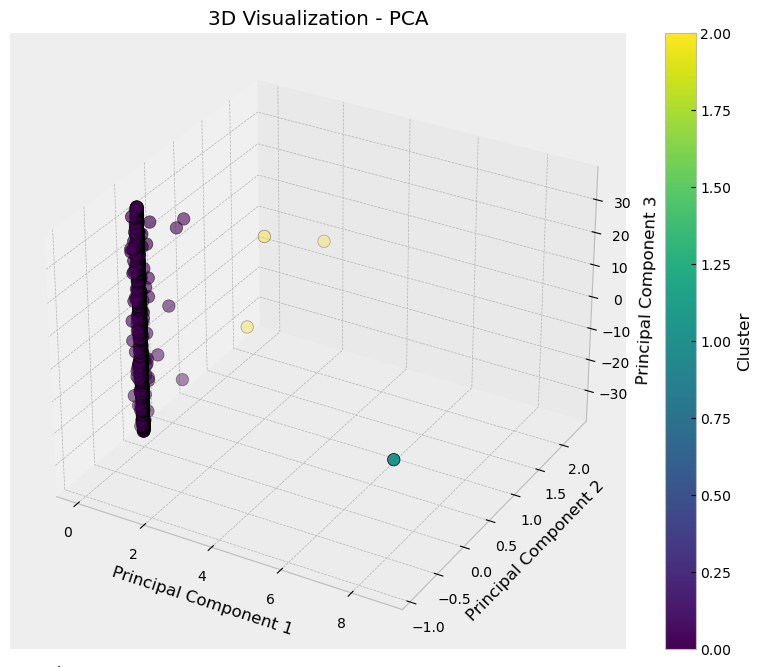

In [978]:
# 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_kmeans, edgecolors='k', marker='o', s=80, cmap='viridis')
ax.set_title('3D Visualization - PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# Add a color bar to represent K-Means clusters
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')
plt.show()


### TSNE

In [979]:
# Apply t-SNE to reduce in 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_numerical)

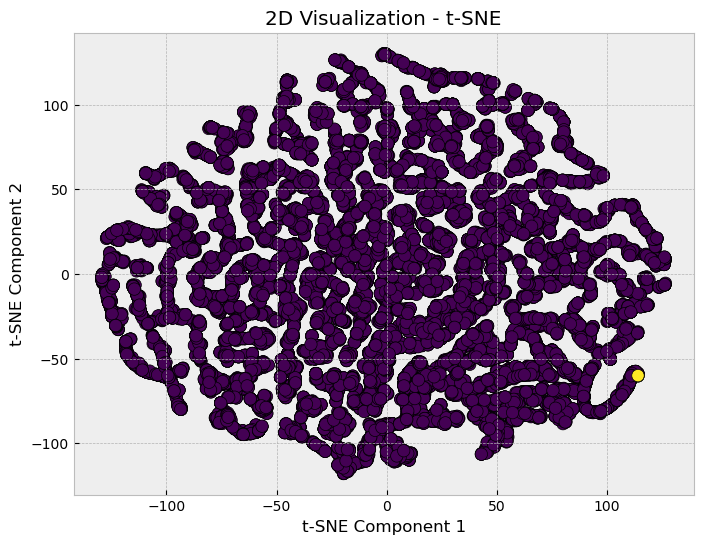

In [980]:
# 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, edgecolors='k', marker='o', s=80, cmap='viridis')
plt.title('2D Visualization - t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [981]:
# Apply t-SNE to reduce in 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_numerical)

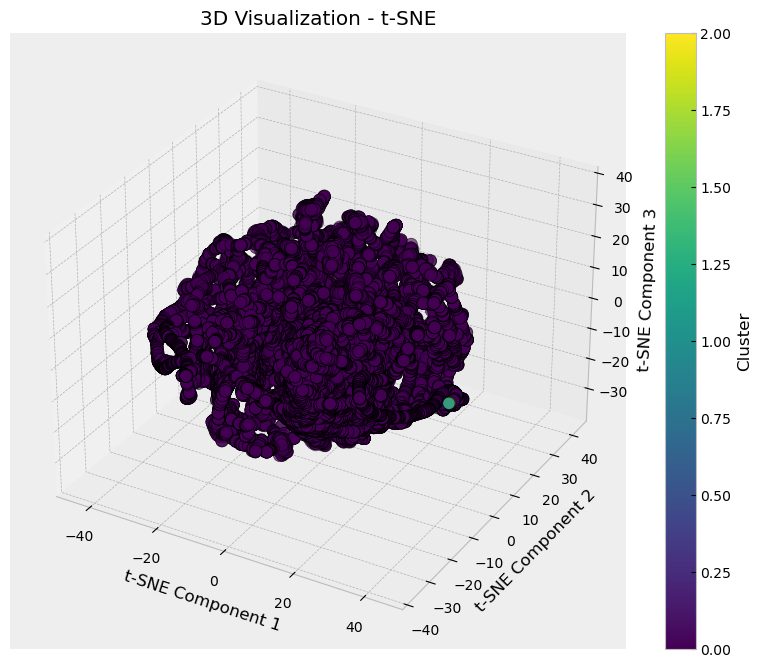

In [982]:
# 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels_kmeans, edgecolors='k', marker='o', s=80, cmap='viridis')
ax.set_title('3D Visualization - t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
# Add a color bar to represent K-Means clusters
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')
plt.show()